In [1]:
import functools
import numpy as np
import sklearn.metrics
import sklearn.datasets
import sklearn.model_selection
import matplotlib.pyplot as plt

import sa.sa as sa
import sa.ann as ann
from sa.utils import *



In [2]:
# Load MNIST digits from sklearn
num_classes = 10
mnist = sklearn.datasets.load_digits(n_class=num_classes)
X, X_test, y, y_test = sklearn.model_selection.train_test_split(mnist.data, mnist.target)

num_inputs = X.shape[1]

y_true = np.zeros((len(y), num_classes))
for i in range(len(y)):
    y_true[i, y[i]] = 1

y_test_true = np.zeros((len(y_test), num_classes))
for i in range(len(y_test)):
    y_test_true[i, y_test[i]] = 1



In [3]:
# Set up
accuracies = []
shape = (num_inputs, 16, 16, num_classes)  # Increase the number of neurons in the hidden layers

num_dimensions = sum(shape[i] * shape[i + 1] + shape[i + 1] for i in range(len(shape) - 1))
initial_temperature = 100.0
final_temperature = 1
cooling_rate = 0.99
print_epochs = False

obj_func = functools.partial(eval_neural_network, shape=shape, X=X, y=y_true.T)

In [4]:
sa_ = sa.SimulatedAnnealing(obj_func, num_dimensions, initial_temperature, final_temperature, cooling_rate, print_epochs=print_epochs)
result = sa_.minimize(shape, X, y)

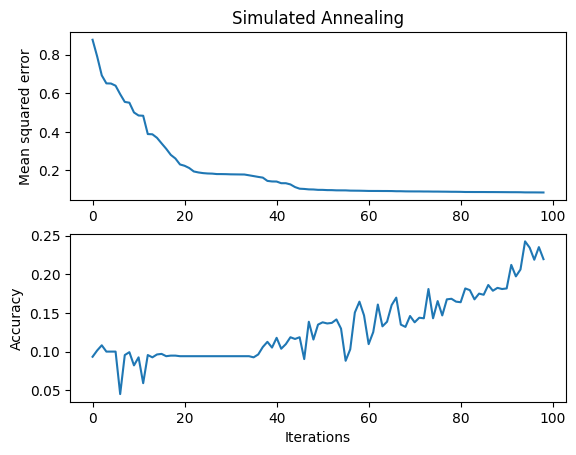

In [5]:
# Plot
error = [tup[1][0] for tup in result.best_scores]
iters = [tup for tup in range(len(result.best_scores))]
figure = plt.figure()
errorplot = plt.subplot(2, 1, 1)
errorplot.plot(iters, error)
plt.title("Simulated Annealing")
plt.ylabel("Mean squared error")

accuracyplot = plt.subplot(2, 1, 2)
accuracyplot.plot(result.accuracies)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")

plt.show()

In [6]:
# Test...
best_weights = vector_to_weights(sa_.best_state, shape)
best_nn = ann.MultiLayerPerceptron(shape, weights=best_weights)
y_test_pred = np.round(best_nn.run(X_test))
print(sklearn.metrics.classification_report(y_test_true, y_test_pred.T))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.61      0.48      0.53        42
           2       0.00      0.00      0.00        42
           3       0.00      0.00      0.00        43
           4       0.00      0.00      0.00        55
           5       0.97      0.81      0.88        47
           6       0.00      0.00      0.00        45
           7       0.00      0.00      0.00        41
           8       0.00      0.00      0.00        47
           9       0.00      0.00      0.00        39

   micro avg       0.81      0.13      0.22       450
   macro avg       0.16      0.13      0.14       450
weighted avg       0.16      0.13      0.14       450
 samples avg       0.13      0.13      0.13       450



C:\Users\mbber\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mbber\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
